### Logistic Regression

In [3]:
# importing the necessary libraries

import pandas as pd

In [4]:
# loading the dataset
hr_data = pd.read_csv ("E:\Sankhyana Training\Datasets\HR_comma_sep.csv")
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# checking the size of teh dataset
hr_data.shape

(14999, 10)

In [6]:
# checking the missing values
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# descriptive summary
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [9]:
# checking the data information
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
# checking all departments in the company

hr_data.Department.value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [11]:
hr_data.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [12]:
# checking the total number of employees that left the company an dthose who did not leave

# 0  -  did not leave the company
# 1  - Left the comapny

hr_data.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [14]:
hr_data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


#### Cross tabulation number of projects

In [16]:
hr_data.number_project.value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

In [15]:
pd.crosstab(hr_data.number_project, hr_data.left)

left,0,1
number_project,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


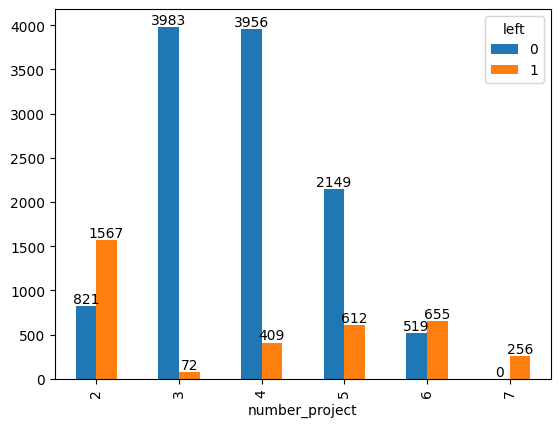

In [23]:
ax = pd.crosstab(hr_data.number_project, hr_data.left).plot(kind = 'bar')

for p in ax.containers:
    ax.bar_label(p)

<Axes: xlabel='number_project'>

### Salary

In [24]:
pd.crosstab(hr_data.salary, hr_data.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


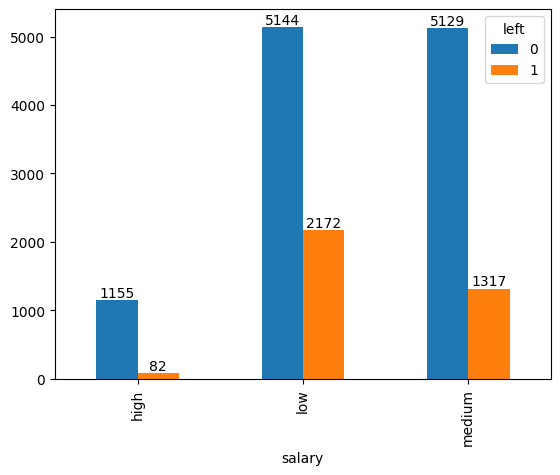

In [25]:
ax = pd.crosstab(hr_data.salary, hr_data.left).plot(kind = 'bar')

for p in ax.containers:
    ax.bar_label(p)

In [27]:
pd.crosstab(hr_data.Department, hr_data.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


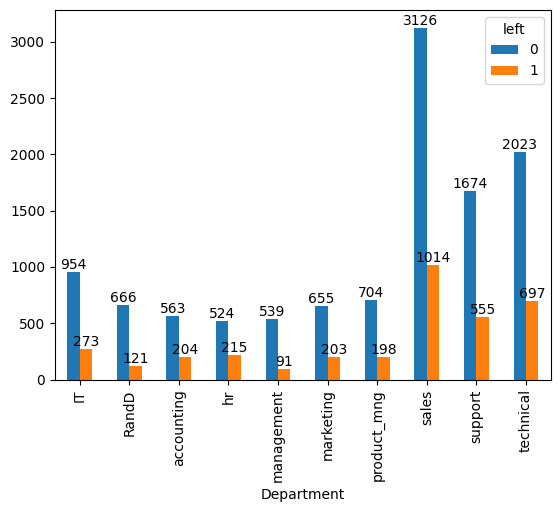

In [28]:
ax = pd.crosstab(hr_data.Department, hr_data.left).plot(kind = 'bar')

for p in ax.containers:
    ax.bar_label(p)

### satisfaction_level

In [29]:
pd.crosstab(hr_data.satisfaction_level, hr_data.left)

left,0,1
satisfaction_level,,
0.09,0,195
0.10,0,358
0.11,0,335
0.12,26,4
0.13,51,3
...,...,...
0.96,203,0
0.97,176,0
0.98,183,0


### average_montly_hours

In [30]:
pd.crosstab(hr_data.average_montly_hours, hr_data.left)

left,0,1
average_montly_hours,,
96,6,0
97,14,0
98,23,0
99,11,0
100,19,0
...,...,...
306,0,18
307,0,14
308,0,20


#### promotion_last_5years

In [31]:
pd.crosstab(hr_data.promotion_last_5years, hr_data.left)

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


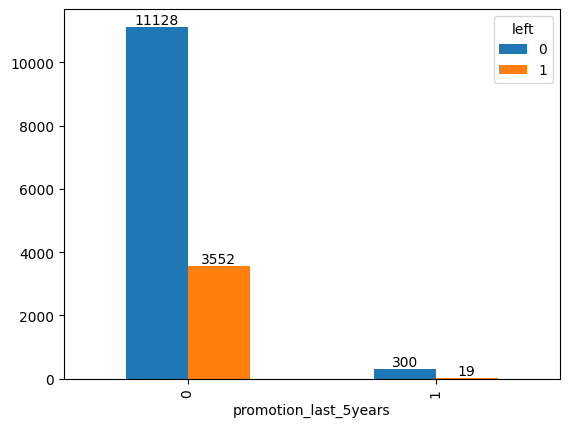

In [34]:
ax=pd.crosstab(hr_data.promotion_last_5years, hr_data.left).plot(kind= 'bar')

## bars = blue = 0 - Did not leave  //// Orange -- 1  - Left
## 0 - were not promoted //// 1 - were promoted

for p in ax.containers:
    ax.bar_label(p)

### STEP 4

In [ ]:
# Salary, promotion in last 5 years, Average monthly hours, satisfaction level

In [36]:
hr_data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [38]:
# selecting the columns
# input variables
sel_data = hr_data [['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary' ]]
sel_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [53]:
dummies = pd.get_dummies(sel_data.salary)
dummies.tail(5)

,high,low,medium
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False
14998,False,True,False


In [55]:
# conctenation of dummies columns with the selected data
input_data = pd.concat([sel_data,dummies ], axis = "columns")
input_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [56]:
# Droping the salary column

input_data1 = input_data.drop('salary', axis ='columns')
input_data1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [39]:
# Target column 
Y = hr_data.left

In [57]:
## Spliting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(input_data1, Y, train_size=70)

In [58]:
# importing the logitsic regression algorithm
from sklearn.linear_model import LogisticRegression

In [59]:
# creating an object of logistic regression algorithm
hr_model = LogisticRegression()
hr_model

LogisticRegression()

In [60]:
# traing the model
hr_model.fit(X_train, Y_train)

LogisticRegression()

### Measuring the model accuracy

In [61]:
hr_model.score(X_test, Y_test)

0.7617388974479201